# ✈️ Flight Fare Prediction

## Life Cycle of Machine Learning Project

- Understanding the Problem Statement  
- Data Collection  
- Data Checks to perform  
- Exploratory Data Analysis  
- Data Pre-Processing  
- Model Training  
- Choose the Best Model  

---

###  Problem Statement

- This project aims to predict the price of airline tickets based on features such as Airline, Source, Destination, Route, Departure/Arrival Time, Duration, Number of Stops, and Additional Info.  
It helps understand how these factors influence the final ticket fare.

---

###  Data Collection

- Dataset Source – https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset/data?select=Data_Train.xlsx
- The dataset consists of 11 columns and approximately 10,626 rows.  
- Each row represents a flight record with detailed features affecting the fare.



## Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Read and Show Top 5 Records of Dataset

In [ ]:
df = pd.read_excel("data/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## ✈️ Flight Fare Prediction Dataset – Feature Explanation
This dataset contains information about various flight journeys, including details like airlines, routes, durations, and prices. Below are the features with brief explanations:

## 🧩 Features
1. Airline:- The name of the airline operating the flight (e.g., IndiGo, Air India, Jet Airways).

2. Date_of_Journey:- The date on which the flight departs. Important for extracting journey day, month, and weekday.

3. Source:- The city from which the flight departs.

4. Destination:- The city where the flight lands.

5. Route:- The path taken by the flight including stopovers (e.g., CCU → IXR → BBI → BLR).

6. Dep_Time:- The scheduled departure time of the flight. 

7. Arrival_Time:- The scheduled arrival time of the flight. 

8. Duration:- Total travel time from departure to arrival (e.g., 2h 50m, 19h). 
9. Total_Stops:- Number of stops between source and destination (e.g., non-stop, 1 stop, 2 stops). 

10. Additional_Info:- Miscellaneous details such as "No info", "In-flight meal not included", or "Business class". Often sparse.

11. Price:- Target variable. The ticket price for the given flight (in INR).

### Shape Of Dataset

In [3]:
df.shape

(10683, 11)

###  Data Checks to perform

- Check Missing values  
- Check Duplicates  
- Check data type  
- Check the number of unique values of each column  
- Check statistics of data set  
- Check various categories present in the different categorical column  


### Check Missing Values

In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is a missing value in 'Route' as well as 'Total_Stops'. 

### Check Duplicates

In [5]:
df.duplicated().sum()

220

There are 220 duplicate values in the dataset

In [6]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

Removed the duplicate dataset

In [7]:
df.shape

(10463, 11)

The dataset is now reduced to 10,463 rows after removing duplicated data.

### Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 899.3+ KB


### Checking the number of unique values of each column

In [9]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Check Statistics of dataset

In [10]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


### Exploring Data

In [11]:

cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

for col in cat_cols:
    print(f"Categories in '{col}' variable:", end=" ")
    print(df[col].unique())
    print()


Categories in 'Airline' variable: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Categories in 'Date_of_Journey' variable: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

Categories in 'Source' variable: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Categories in 'Destination' variable: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata

 Since there are so many unique values in 'Route' and 'Date_Of_Journey' we will check for top 10 most frequent values

In [12]:
print("Top 10 most common routes:")
print(df['Route'].value_counts().head(10))

print("\n")
print("Top 10 most common date of journey:")
print(df['Date_of_Journey'].value_counts().head(10))


Top 10 most common routes:
Route
DEL → BOM → COK    2376
BLR → DEL          1536
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: count, dtype: int64


Top 10 most common date of journey:
Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
Name: count, dtype: int64


### Adding Columns for Day, Month and Year from 'Date_of_Journey' Column

In [13]:
###Feature Engineering

df['Day'] = df['Date_of_Journey'].str.split("/").str[0]
df['Month'] = df['Date_of_Journey'].str.split("/").str[1]
df['Year'] = df['Date_of_Journey'].str.split("/").str[2]


In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


Converting the Date, Month and Year to integer

In [15]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

Dropping the 'Date_of_Journey' Column

In [16]:
df = df.drop(['Date_of_Journey'], axis = 1)

Show Top Records

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Drawing histogram for Price to check trends of Price

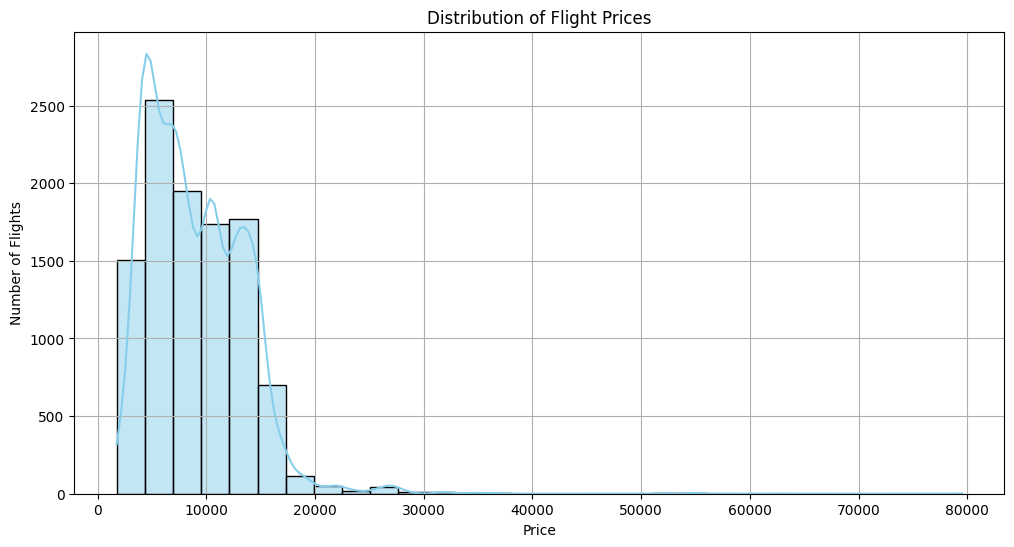

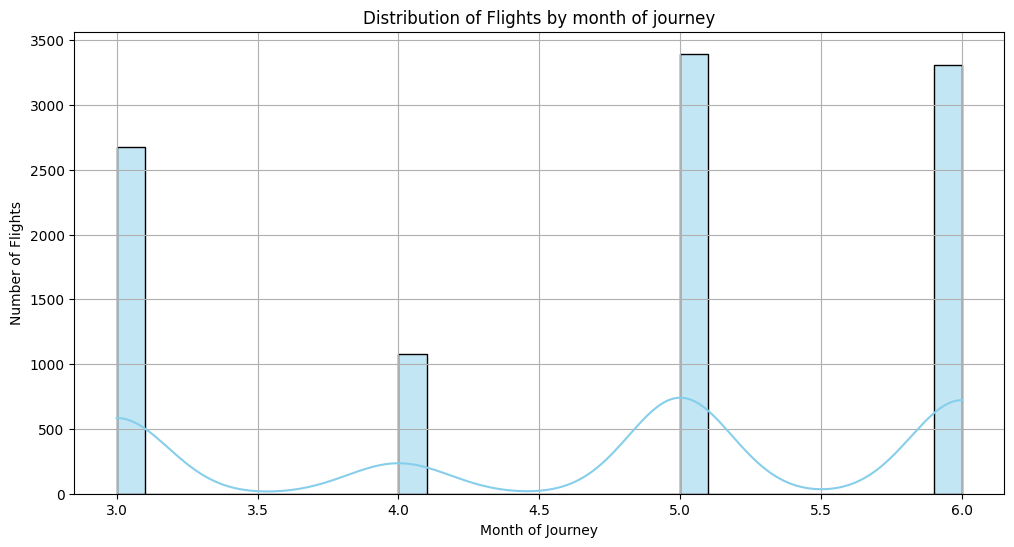

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x = 'Price', bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x = 'Month', bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Flights by month of journey')
plt.xlabel('Month of Journey')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()

### Observation from Price Distribution:-
1. Most flights are concentrated below ₹15,000.
2. Majority of flights are low to mid priced and a small number of premium or last-minute high prices.

### Observation from Disrtibution flight by Month of Journey
1. The highest number of flights are observed in May(05) and June(06).
2. The demand of flights are moderate in April(04) and March(03).
3. The pattern suggests seasonal demand, with a peak during summer months — likely due to:-
* Summer vacation
* Increased travel and tourism
* Possibly more business travel before Q2 closings

The 'Arrival_Time' column sometimes includes the date and month along with the time. Since we only need the arrival time, we remove the date and month portion to clean the data.

In [19]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

From the 'Arrival_Time' column, we extract the hour and minute values separately and create two new columns: 'Arrival_hour' and 'Arrival_minutes' for better analysis and modeling.

In [20]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minutes'] = df['Arrival_Time'].str.split(':').str[1]

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


To prepare the data for model training, it is essential to convert the 'Arrival_hour' and 'Arrival_minutes' columns into integer data types. This ensures that the data is in the correct format for analysis and modeling.

In [22]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
 10  Day              10463 non-null  int32 
 11  Month            10463 non-null  int32 
 12  Year             10463 non-null  int32 
 13  Arrival_hour     10463 non-null  int32 
 14  Arrival_minutes  10463 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1021.9+ KB


Since we've already extracted the relevant information from 'Arrival_Time', the original column is no longer needed and can be dropped to keep the dataset clean and focused.

In [23]:
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


Similar to the process applied to the 'Arrival_Time' column, we extract the hour and minute components from the 'Dep_Time' column to create two new features: 'Dept_hour' and 'Dept_minutes'. These features are then converted to integer data types to ensure compatibility for analysis and modeling. Finally, the original 'Dep_Time' column is dropped to maintain a clean and focused dataset.

In [25]:
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_minutes'] = df['Dep_Time'].str.split(':').str[1]
df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_minutes'] = df['Dept_minutes'].astype(int)
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10463 non-null  object
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10463 non-null  object
 7   Price            10463 non-null  int64 
 8   Day              10463 non-null  int32 
 9   Month            10463 non-null  int32 
 10  Year             10463 non-null  int32 
 11  Arrival_hour     10463 non-null  int32 
 12  Arrival_minutes  10463 non-null  int32 
 13  Dept_hour        10463 non-null  int32 
 14  Dept_minutes     10463 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 940.2+ KB


Since the 'Total_Stops' column has a limited number of unique values, we can map these categorical values to integers. This transformation will make the data more suitable for modeling and training purposes.

In [28]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [29]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
8893,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


Replacing null value of 'Total_Stops' with 0

In [ ]:
df['Total_Stops'].fillna(0, inplace = True)

In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


Since we have already calculated the 'Total_Stops', the 'Route' feature becomes redundant and does not add significant value to the analysis. Therefore, we will remove it to simplify the dataset and focus on more relevant features.

In [32]:
df.drop('Route', axis = 1, inplace = True)

In [33]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


Extracted 'Duration_hour' from 'Duration' to simplify flight durations for better analysis and modeling.

In [34]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [35]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4


Converting 'Duration_hour' to Integer

In [36]:

df['Duration_hour'] = df['Duration_hour'].str.extract('(\d+)').astype(int)


Perform similar extraction for 'Duration_minutes' as done for 'Duration_hours'.

In [37]:
df['Duration_minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

Filled null values in 'Duration_minutes' with 0

In [38]:
df['Duration_minutes'].fillna(0, inplace = True)
df['Duration_minutes'] = df['Duration_minutes'].astype(int)

Combined 'Duration_hour' and 'Duration_minutes' into 'Duration_minutes' to represent total duration in minutes.

In [39]:
df['Duration_minutes'] = df['Duration_hour'] * 60 + df['Duration_minutes']
df['Duration_minutes']

0         170
1         445
2        1140
3         325
4         285
         ... 
10458     150
10459     155
10460     180
10461     160
10462     500
Name: Duration_minutes, Length: 10463, dtype: int32

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10463 non-null  object 
 1   Source            10463 non-null  object 
 2   Destination       10463 non-null  object 
 3   Duration          10463 non-null  object 
 4   Total_Stops       10463 non-null  float64
 5   Additional_Info   10463 non-null  object 
 6   Price             10463 non-null  int64  
 7   Day               10463 non-null  int32  
 8   Month             10463 non-null  int32  
 9   Year              10463 non-null  int32  
 10  Arrival_hour      10463 non-null  int32  
 11  Arrival_minutes   10463 non-null  int32  
 12  Dept_hour         10463 non-null  int32  
 13  Dept_minutes      10463 non-null  int32  
 14  Duration_hour     10463 non-null  int32  
 15  Duration_minutes  10463 non-null  int32  
dtypes: float64(1), int32(9), int64(1), objec

Dropping 'Duration_hour' and 'Duration' as they are no longer needed.

In [41]:
df.drop(['Duration', 'Duration_hour'], axis = 1, inplace = True)

In [42]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,285


In [43]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,285


### Duration vs Price ScatterPlot

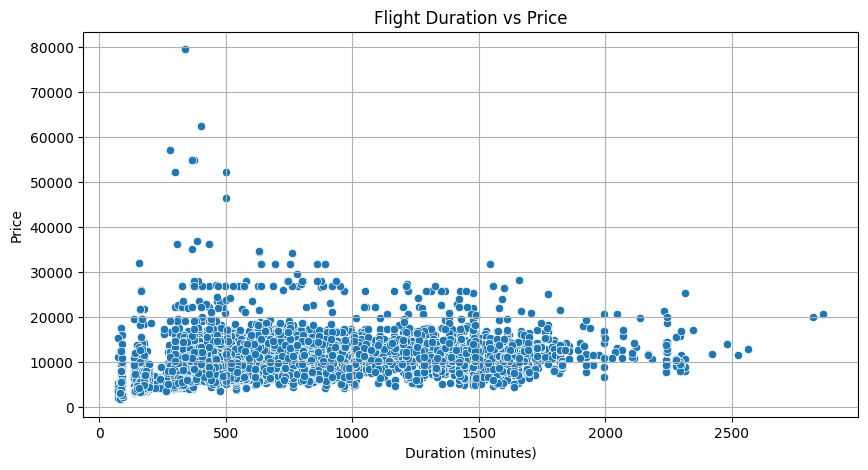

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Duration_minutes', y='Price', data=df)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)
plt.show()



Observation:
- Majority of prices are under ₹20,000 regardless of duration.
- Short flights show a wide price variation.

### Arrival Time Distribution

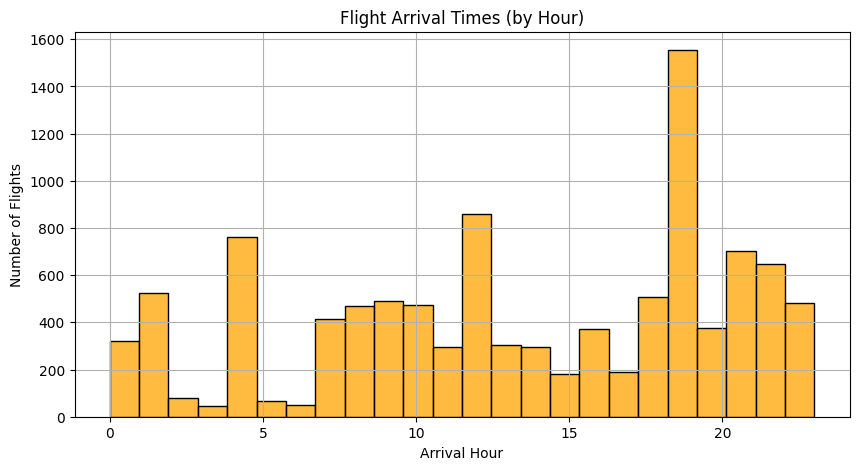

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['Arrival_hour'], bins=24, kde=False, color='orange')
plt.title('Flight Arrival Times (by Hour)')
plt.xlabel('Arrival Hour')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()


 Observation:
 - Peak arrival time is around 7–8 PM (19:00 hours).
 - Midday (12 PM to 3 PM) has fewer arrivals.

In [47]:
df.to_excel("data/cleaned_flight_data.xlsx", index=False)